Top 100 Bestselling Book Reviews


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
top100 = pd.read_csv("Top-100 Trending Books.csv", index_col = 0)
reviews = pd.read_csv("customer reviews.csv")

In [40]:
top100.head(200)

,book title,book price,rating,author,year of publication,genre,url
Rank,,,,,,,
1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...
...,...,...,...,...,...,...,...
96,First Little Readers Parent Pack: Guided Readi...,11.40,4.7,Deborah Schecter,2010,Nonfiction,amazon.com/First-Little-Readers-Parent-Pack/dp...
97,Hatchet,5.14,4.7,Gary Paulsen,1987,"young adult novel, adventure novel, survival ...",amazon.com/Hatchet-Gary-Paulsen/dp/1416936475/...
98,"The Wager: A Tale of Shipwreck, Mutiny and Murder",15.30,4.5,David Grann,2023,Nonfiction,amazon.com/Wager-Tale-Shipwreck-Mutiny-Murder/...


In [41]:
reviews.head()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


In [42]:
top100_reviews = top100.merge(reviews, left_on = "book title", right_on = "book name")

In [43]:
top100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book title           100 non-null    object 
 1   book price           100 non-null    float64
 2   rating               97 non-null     float64
 3   author               100 non-null    object 
 4   year of publication  100 non-null    int64  
 5   genre                100 non-null    object 
 6   url                  100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.2+ KB


d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


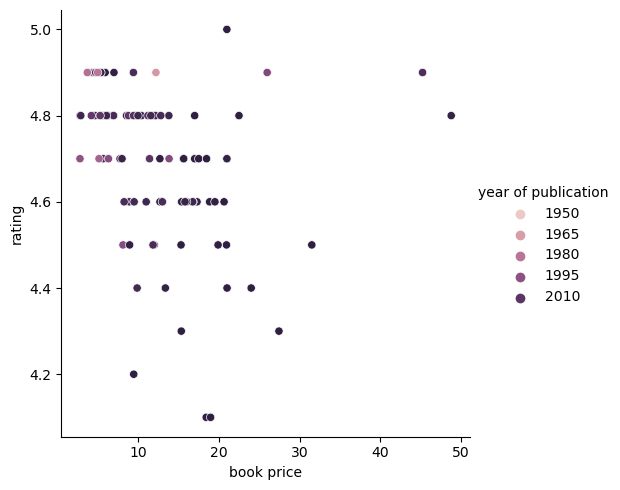

In [44]:
sns.relplot(x = "book price", y = "rating", data = top100, kind = "scatter", hue = "year of publication")

In [45]:
top100_reviews

,book title,book price,rating,author,year of publication,genre,url,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,The Wonky Donkey,5.28,4.8,Craig Smith,2009,"Childrens, Picture Books",amazon.com/Wonky-Donkey-Craig-Smith/dp/0545261...,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,02-11-2023,"Reviewed in the United States November 2, 2023",545261244
886,The Wonky Donkey,5.28,4.8,Craig Smith,2009,"Childrens, Picture Books",amazon.com/Wonky-Donkey-Craig-Smith/dp/0545261...,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,30-10-2023,"Reviewed in the United States October 30, 2023",545261244
887,The Wonky Donkey,5.28,4.8,Craig Smith,2009,"Childrens, Picture Books",amazon.com/Wonky-Donkey-Craig-Smith/dp/0545261...,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,24-10-2023,"Reviewed in the United States October 24, 2023",545261244
888,The Wonky Donkey,5.28,4.8,Craig Smith,2009,"Childrens, Picture Books",amazon.com/Wonky-Donkey-Craig-Smith/dp/0545261...,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,19-10-2023,"Reviewed in the United States October 19, 2023",545261244


In [46]:
top100_reviews_by_verification = top100_reviews.groupby(by = "is_verified")

In [47]:
top100_reviews_by_verification.describe()

book price                                                         \
                 count      mean       std    min    25%    50%    75%    max   
is_verified                                                                     
False              3.0  21.00000  0.000000  21.00  21.00  21.00  21.00  21.00   
True             887.0  11.97903  7.634674   2.79   6.26  10.39  15.79  48.77   

            rating           ...    Sno        reviewer rating            \
             count     mean  ...    75%    max           count      mean   
is_verified                  ...                                           
False          3.0  4.40000  ...  448.5  449.0             3.0  4.333333   
True         887.0  4.69425  ...  697.5  919.0           887.0  4.820744   

                                                
                  std  min  25%  50%  75%  max  
is_verified                                     
False        0.577350  4.0  4.0  4.0  4.5  5.0  
True         0.438675  2.0  5.0  5.0  5.0  5.0  

[2 rows x 40 columns]

In [48]:
top100_reviews.query('is_verified == False')

,book title,book price,rating,author,year of publication,genre,url,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
467,Hidden Potential: The Science of Achieving Gre...,21.0,4.4,Adam M. Grant,2023,"Nonfiction, Self Help, Psychology, Business, L...",amazon.com/Hidden-Potential-Science-Achieving-...,447,Hidden Potential: The Science of Achieving Gre...,Enthusiastically presented - carefully structured,Dave Nat,4,You can tell Adam Grant takes his work serious...,False,25-10-2023,"Reviewed in the United States October 25, 2023",593653149
468,Hidden Potential: The Science of Achieving Gre...,21.0,4.4,Adam M. Grant,2023,"Nonfiction, Self Help, Psychology, Business, L...",amazon.com/Hidden-Potential-Science-Achieving-...,448,Hidden Potential: The Science of Achieving Gre...,A lot of our school system is set up one way w...,Caroline L.,4,Adam Grant goes into why we should be celebrat...,False,26-10-2023,"Reviewed in the United States October 26, 2023",593653149
469,Hidden Potential: The Science of Achieving Gre...,21.0,4.4,Adam M. Grant,2023,"Nonfiction, Self Help, Psychology, Business, L...",amazon.com/Hidden-Potential-Science-Achieving-...,449,Hidden Potential: The Science of Achieving Gre...,Embrace the Power of Being a Sponge,Noreen Wise,5,"Adam Grant is an amazing storyteller, and ""Hid...",False,30-10-2023,"Reviewed in the United States October 30, 2023",593653149


### Review description length vs review score: check for correlation and visualization.

In [49]:
# getting series of description length values
rev_desc = top100_reviews['review description']
rev_desc = pd.Series(rev_desc)
rev_desc_length = rev_desc.str.len()

top100_reviews['review description length'] = rev_desc_length
review_score = top100_reviews['reviewer rating']

#### Visualisation and correlation check

There is no significant correlation between length of the review (based od string length) and the review score. This could also be seen on the plot when considering the whole range of reviews.

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[ 1.        , -0.14862296],
       [-0.14862296,  1.        ]])

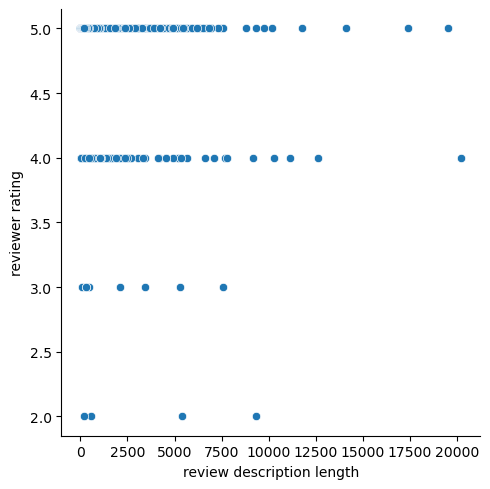

In [50]:
sns.relplot(x = "review description length", y = "reviewer rating", data = top100_reviews, kind = "scatter")
np.corrcoef(x = top100_reviews['review description length'], y = top100_reviews['reviewer rating'])

#### Analysis of correlation without text length outliers

Outliers will be dropped using IQR rule.

In [58]:
rev_desc_length.describe()

count      890.000000
mean      1143.767416
std       2136.416001
min          3.000000
25%        130.250000
50%        362.000000
75%       1029.500000
max      20208.000000
Name: review description, dtype: float64

In [67]:
Q3 = np.quantile(rev_desc_length, 0.75)
print('Mean:', '%.2f' % rev_desc_length.mean(), 'Median:', rev_desc_length.median())
Q1 = np.quantile(rev_desc_length, 0.25)
IQR = Q3 - Q1
print('Q1:', Q1, 'Q3:', Q3, 'IQR:', IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print('Lower range:', lower_range, 'Upper range:', upper_range)

# considering the fact that review cannot have less than 0 words, 0 is lower level
lower_range = 0
print('After adjustment:\n','Lower range:', lower_range, 'Upper range:', upper_range)

Mean: 1143.77 Median: 362.0
Q1: 130.25 Q3: 1029.5 IQR: 899.25
Lower range: -1218.625 Upper range: 2378.375
After adjustment:
 Lower range: 0 Upper range: 2378.375


In [108]:
#rev_desc_length.where(rev_desc_length < upper_range).dropna()
#rev_desc_length.loc[lambda x : (x < upper_range)]

s1 = rev_desc_length < upper_range
s2 = rev_desc_length > 0

s1 = list(s1)
s2 = list(s2)

s1 = np.array(s1, dtype = bool)
s2 = np.array(s2, dtype = bool)

# Boolean vector to select indexes that match the conditions
final_list = list(np.logical_and(s1, s2))


d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[ 1.        , -0.12657871],
       [-0.12657871,  1.        ]])

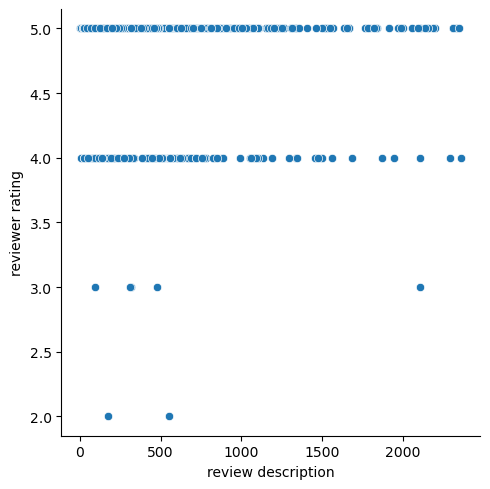

In [107]:
sns.relplot(x = rev_desc_length[final_list], y = review_score[final_list] , kind = "scatter")
np.corrcoef(x = rev_desc_length[final_list], y = review_score[final_list])

There is no correlation even after dropping the outliers.

### Distribution of book genres in the data set.

In [140]:
unique_titles = top100_reviews['book title'].unique()


890


In [139]:
genres = top100_reviews['genre']
genres = list(genres)

#splitted_genres = [i.split(', ')[:] for i in genres]

splitted_genres = []
for x in genres:
    splitted_genres.append(x.split(', ')[:])


print(len(splitted_genres))



890


In [137]:
flat_list = []
for sublist in splitted_genres:
    for item in sublist:
        flat_list.append(item)

print(flat_list)
print(len(flat_list))
myset = set(flat_list)
print(myset)
print(len(myset))

['Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Memoir', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Childrens', 'Fiction', 'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Humor', 'Middle Grade', 'Nonfiction', 'True Crime', 'Nonfiction', 'True Crime', 'Nonfiction', 'True Crime', 'Nonfiction', 'True Crime', 'Nonfiction', 'True Crime', 'Nonfiction', 'True Crime', 'Nonfiction', 'True Crime', 'No